<img src=img.webp alt="Predicción del Éxito de Videojuegos" width="100%" height="300px">


 **Proyecto: Predicción del Éxito de Videojuegos**
1. Definición del Problema:
- Objetivo: Crear un modelo que prediga el éxito de un videojuego basado en características como género, plataforma, desarrollador, presupuesto, y características del juego.
- Éxito: Definido como una combinación de ventas, críticas y popularidad.

In [25]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from math import ceil

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Carga de datos
# ==============================================================================
steam_store = pd.read_csv('steam_store_data_2024.csv')
steam = pd.read_csv('steam-200k.csv')
video_games = pd.read_csv('Video_Games.csv')
vgsales = pd.read_csv('vgsales.csv')

Primero, cargaremos los archivos y echaremos un vistazo a sus primeras filas para entender la estructura y el contenido de cada uno.

In [2]:
steam

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [3]:
steam.columns

Index(['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0'], dtype='object')

In [4]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   151603712                   199999 non-null  int64  
 1   The Elder Scrolls V Skyrim  199999 non-null  object 
 2   purchase                    199999 non-null  object 
 3   1.0                         199999 non-null  float64
 4   0                           199999 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [5]:
steam. describe().T

,count,mean,std,min,25%,50%,75%,max
151603712,199999.0,1.036556e+08,7.208084e+07,5250.0,47384202.0,86912006.0,154230933.0,309903146.0
1.0,199999.0,1.787447e+01,1.380573e+02,0.1,1.0,1.0,1.3,11754.0
0,199999.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [6]:
steam_store

,title,description,price,salePercentage,recentReviews,allReviews
0,Ori and the Will of the Wisps,Play the critically acclaimed masterpiece. Emb...,$9.89,-67%,Overwhelmingly Positive,Overwhelmingly Positive
1,"Flashing Lights - Police, Firefighting, Emerge...",Play solo or in up to 10-player multiplayer co...,$8.49,-66%,Very Positive,Very Positive
2,Thronefall,A minimalist game about building and defending...,$5.24,-25%,Overwhelmingly Positive,Overwhelmingly Positive
3,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,The Definitive Edition includes the critically...,$23.99,-40%,Very Positive,Very Positive
4,UNDYING,"As Anling’s zombie infection sets in, her days...",$13.99,-30%,Mostly Positive,Mostly Positive
...,...,...,...,...,...,...
81,Bendy and the Dark Revival,Bendy and the Dark Revival® is a first-person ...,$5.99,-80%,Very Positive,Very Positive
82,STAR WARS™ - The Force Unleashed™ Ultimate Sit...,"A game that will show gamers the deepest, dark...",$6.99,-65%,Very Positive,Very Positive
83,Thymesia,Thymesia is a gruelling action-RPG with fast-p...,$14.99,-40%,Very Positive,Very Positive
84,Last Train Home,The Great War is over - the fight continues. C...,$26.39,-34%,Very Positive,Very Positive


In [7]:
steam_store.columns

Index(['title', 'description', 'price', 'salePercentage', 'recentReviews',
       'allReviews'],
      dtype='object')

In [8]:
steam_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           86 non-null     object
 1   description     82 non-null     object
 2   price           61 non-null     object
 3   salePercentage  59 non-null     object
 4   recentReviews   57 non-null     object
 5   allReviews      57 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB


In [9]:
steam_store.describe().T

,count,unique,top,freq
title,86,75,Ori and the Will of the Wisps,2
description,82,71,Play the critically acclaimed masterpiece. Emb...,2
price,61,34,$23.99,6
salePercentage,59,17,-40%,10
recentReviews,57,5,Very Positive,40
allReviews,57,5,Very Positive,40


In [10]:
vgsales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [11]:
vgsales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [12]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
vgsales.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [14]:
video_games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
video_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [16]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [17]:
video_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


## Exploración Inicial de los Datos
- steam_store_data_2024.csv:
    - Información sobre los juegos de Steam, incluyendo título, descripción, precio, porcentaje de descuento y calificaciones recientes y generales.
- steam-200k.csv:
    - Datos de interacción de usuarios con juegos en Steam, incluyendo compras y horas jugadas.
- vgsales.csv:
    - Datos de ventas de videojuegos por región y globalmente, incluyendo información sobre plataforma, género y editorial.
- Video_Games.csv:
    - Datos similares a vgsales.csv, pero con información adicional sobre puntuaciones de críticos y usuarios, desarrollador y clasificación.
## Plan de Acción
- Integración de Datos:
    - Combinar la información de ventas y críticas de vgsales.csv y Video_Games.csv.
    - Enriquecer con datos adicionales de steam_store_data_2024.csv y steam-200k.csv.
- Preprocesamiento de Datos:
    - Limpiar y normalizar los datos.
    - Manejar valores faltantes.
    - Convertir variables categóricas en variables numéricas.
- Ingeniería de Características:
    - Crear nuevas características útiles para la predicción del éxito del juego.
## Modelado:
- Entrenar y evaluar diferentes modelos de regresión y clasificación.
- Seleccionar el mejor modelo basado en las métricas de evaluación.

Vamos a comenzar integrando los datos de vgsales.csv y Video_Games.csv. Luego, agregaremos información relevante de steam_store_data_2024.csv y steam-200k.csv.

In [18]:
# Renombrar la columna 'Year' en vgsales a 'Year_of_Release'
vgsales.rename(columns={'Year': 'Year_of_Release'}, inplace=True)

# Unir los datos de vgsales y Video_Games en una sola tabla basada en el nombre del juego
merged_data = pd.merge(vgsales, video_games, on=["Name", "Platform", "Year_of_Release", "Genre", "Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"], how="outer")

merged_data

,Rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,NaN,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Frozen: Olaf's Quest,3DS,2013.0,Platform,Disney Interactive Studios,0.27,0.27,0.00,0.05,0.60,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.21,0.26,0.00,0.04,0.52,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552,15526.0,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,0.01,0.01,0.00,0.00,0.02,54.0,5.0,5.7,6.0,THQ,E
21553,471.0,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN
21554,9137.0,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,0.00,0.00,0.14,0.00,0.14,NaN,NaN,NaN,NaN,NaN,NaN
21555,NaN,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
merged_data.columns

Index(['Rank', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

In [20]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21557 entries, 0 to 21556
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             16598 non-null  float64
 1   Name             21555 non-null  object 
 2   Platform         21557 non-null  object 
 3   Year_of_Release  21214 non-null  float64
 4   Genre            21555 non-null  object 
 5   Publisher        21498 non-null  object 
 6   NA_Sales         21557 non-null  float64
 7   EU_Sales         21557 non-null  float64
 8   JP_Sales         21557 non-null  float64
 9   Other_Sales      21557 non-null  float64
 10  Global_Sales     21557 non-null  float64
 11  Critic_Score     8137 non-null   float64
 12  Critic_Count     8137 non-null   float64
 13  User_Score       10015 non-null  object 
 14  User_Count       7590 non-null   float64
 15  Developer        10096 non-null  object 
 16  Rating           9950 non-null   object 
dtypes: float64(1

In [21]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year_of_Release,21214.0,2007.385453,5.622018,1980.00,2005.00,2008.00,2011.00,2020.00
NA_Sales,21557.0,0.297561,0.885828,0.00,0.01,0.09,0.28,41.49
EU_Sales,21557.0,0.177797,0.590746,0.00,0.00,0.03,0.14,29.02
JP_Sales,21557.0,0.076520,0.318050,0.00,0.00,0.00,0.03,10.22
Other_Sales,21557.0,0.058291,0.203038,0.00,0.00,0.01,0.05,10.57
Global_Sales,21557.0,0.610402,1.745238,0.01,0.07,0.20,0.55,82.74
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [28]:
# Limpiar datos (eliminar filas con valores nulos en columnas críticas)
cleaned_data = merged_data.dropna(subset=['Name', 'Genre', 'Publisher', 'Year_of_Release'])

In [30]:
# Eliminar la columna 'Rank'
cleaned_data.drop(columns=['Rank'], inplace=True)

In [33]:
# Convertir 'User_Score' a numérico, reemplazando valores no numéricos con NaN y luego imputar
cleaned_data['User_Score'] = pd.to_numeric(cleaned_data['User_Score'], errors='coerce')

In [34]:
# Imputar valores nulos en columnas numéricas con la media
numeric_columns = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
for column in numeric_columns:
    cleaned_data[column].fillna(cleaned_data[column].mean(), inplace=True)

# Imputar valores nulos en columnas categóricas con la moda
categorical_columns = ['Developer', 'Rating']
for column in categorical_columns:
    cleaned_data[column].fillna(cleaned_data[column].mode()[0], inplace=True)

In [35]:
# Redefinir la lista de columnas categóricas
categorical_columns = ['Developer', 'Rating']

# Convertir 'User_Score' a numérico nuevamente, reemplazando valores no numéricos con NaN
cleaned_data['User_Score'] = pd.to_numeric(cleaned_data['User_Score'], errors='coerce')

# Imputar valores nulos en columnas numéricas con la media
for column in numeric_columns:
    cleaned_data[column].fillna(cleaned_data[column].mean(), inplace=True)

# Imputar valores nulos en columnas categóricas con la moda
for column in categorical_columns:
    cleaned_data[column].fillna(cleaned_data[column].mode()[0], inplace=True)

In [37]:
# Aplicar one-hot encoding a las variables categóricas
categorical_features = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
data_with_dummies = pd.get_dummies(cleaned_data, columns=categorical_features)

# Mostrar las primeras filas del dataframe resultante
data_with_dummies_head = data_with_dummies.head()


data_with_dummies_head

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,Beyblade Burst,2016.0,0.00,0.00,0.03,0.00,0.03,68.997119,26.440992,7.1269,...,False,False,False,True,False,False,False,False,False,False
1,Fire Emblem Fates,2015.0,0.81,0.23,0.52,0.11,1.68,68.997119,26.440992,7.1269,...,False,False,False,True,False,False,False,False,False,False
2,Frozen: Olaf's Quest,2013.0,0.27,0.27,0.00,0.05,0.60,68.997119,26.440992,7.1269,...,False,False,False,True,False,False,False,False,False,False
3,Frozen: Olaf's Quest,2013.0,0.21,0.26,0.00,0.04,0.52,68.997119,26.440992,7.1269,...,False,False,False,True,False,False,False,False,False,False
4,Haikyu!! Cross Team Match!,2016.0,0.00,0.00,0.04,0.00,0.04,68.997119,26.440992,7.1269,...,False,False,False,True,False,False,False,False,False,False


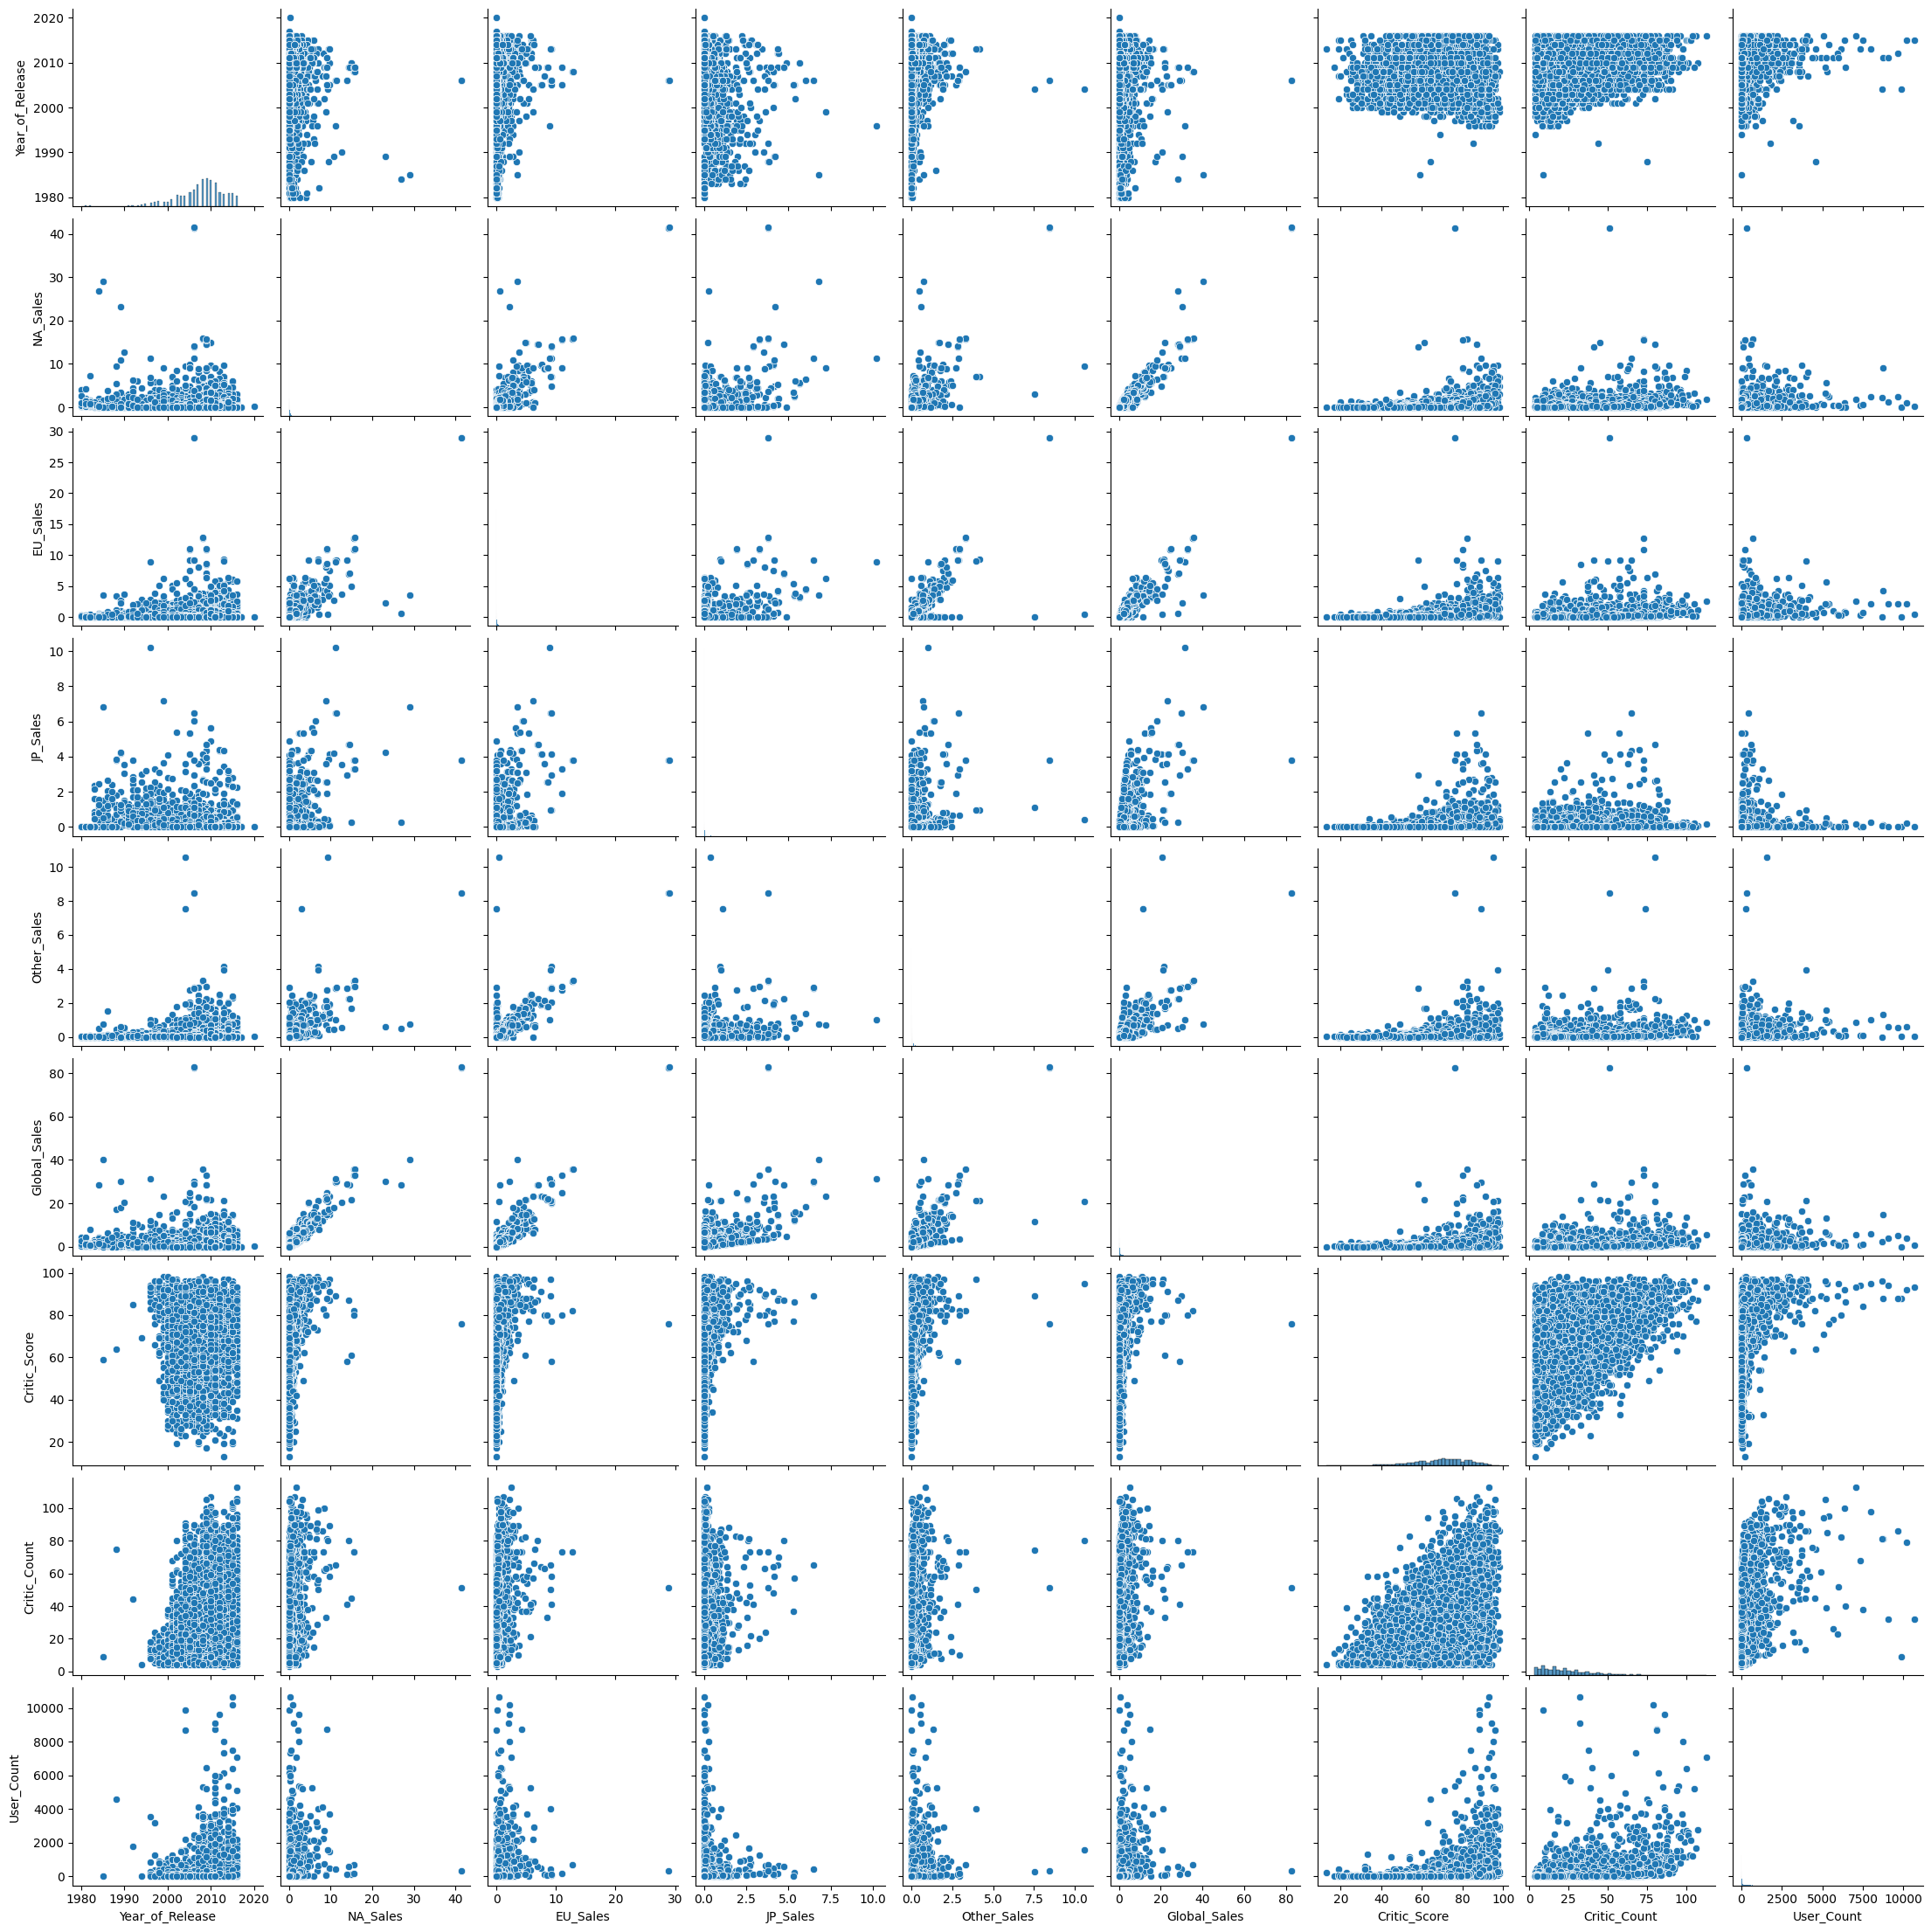

In [40]:
# Seleccionar columnas numéricas relevantes
numeric_columns = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Crear el pairplot con histogramas en la diagonal
pairplot = sns.pairplot(merged_data[numeric_columns], diag_kind='hist')
plt.show()

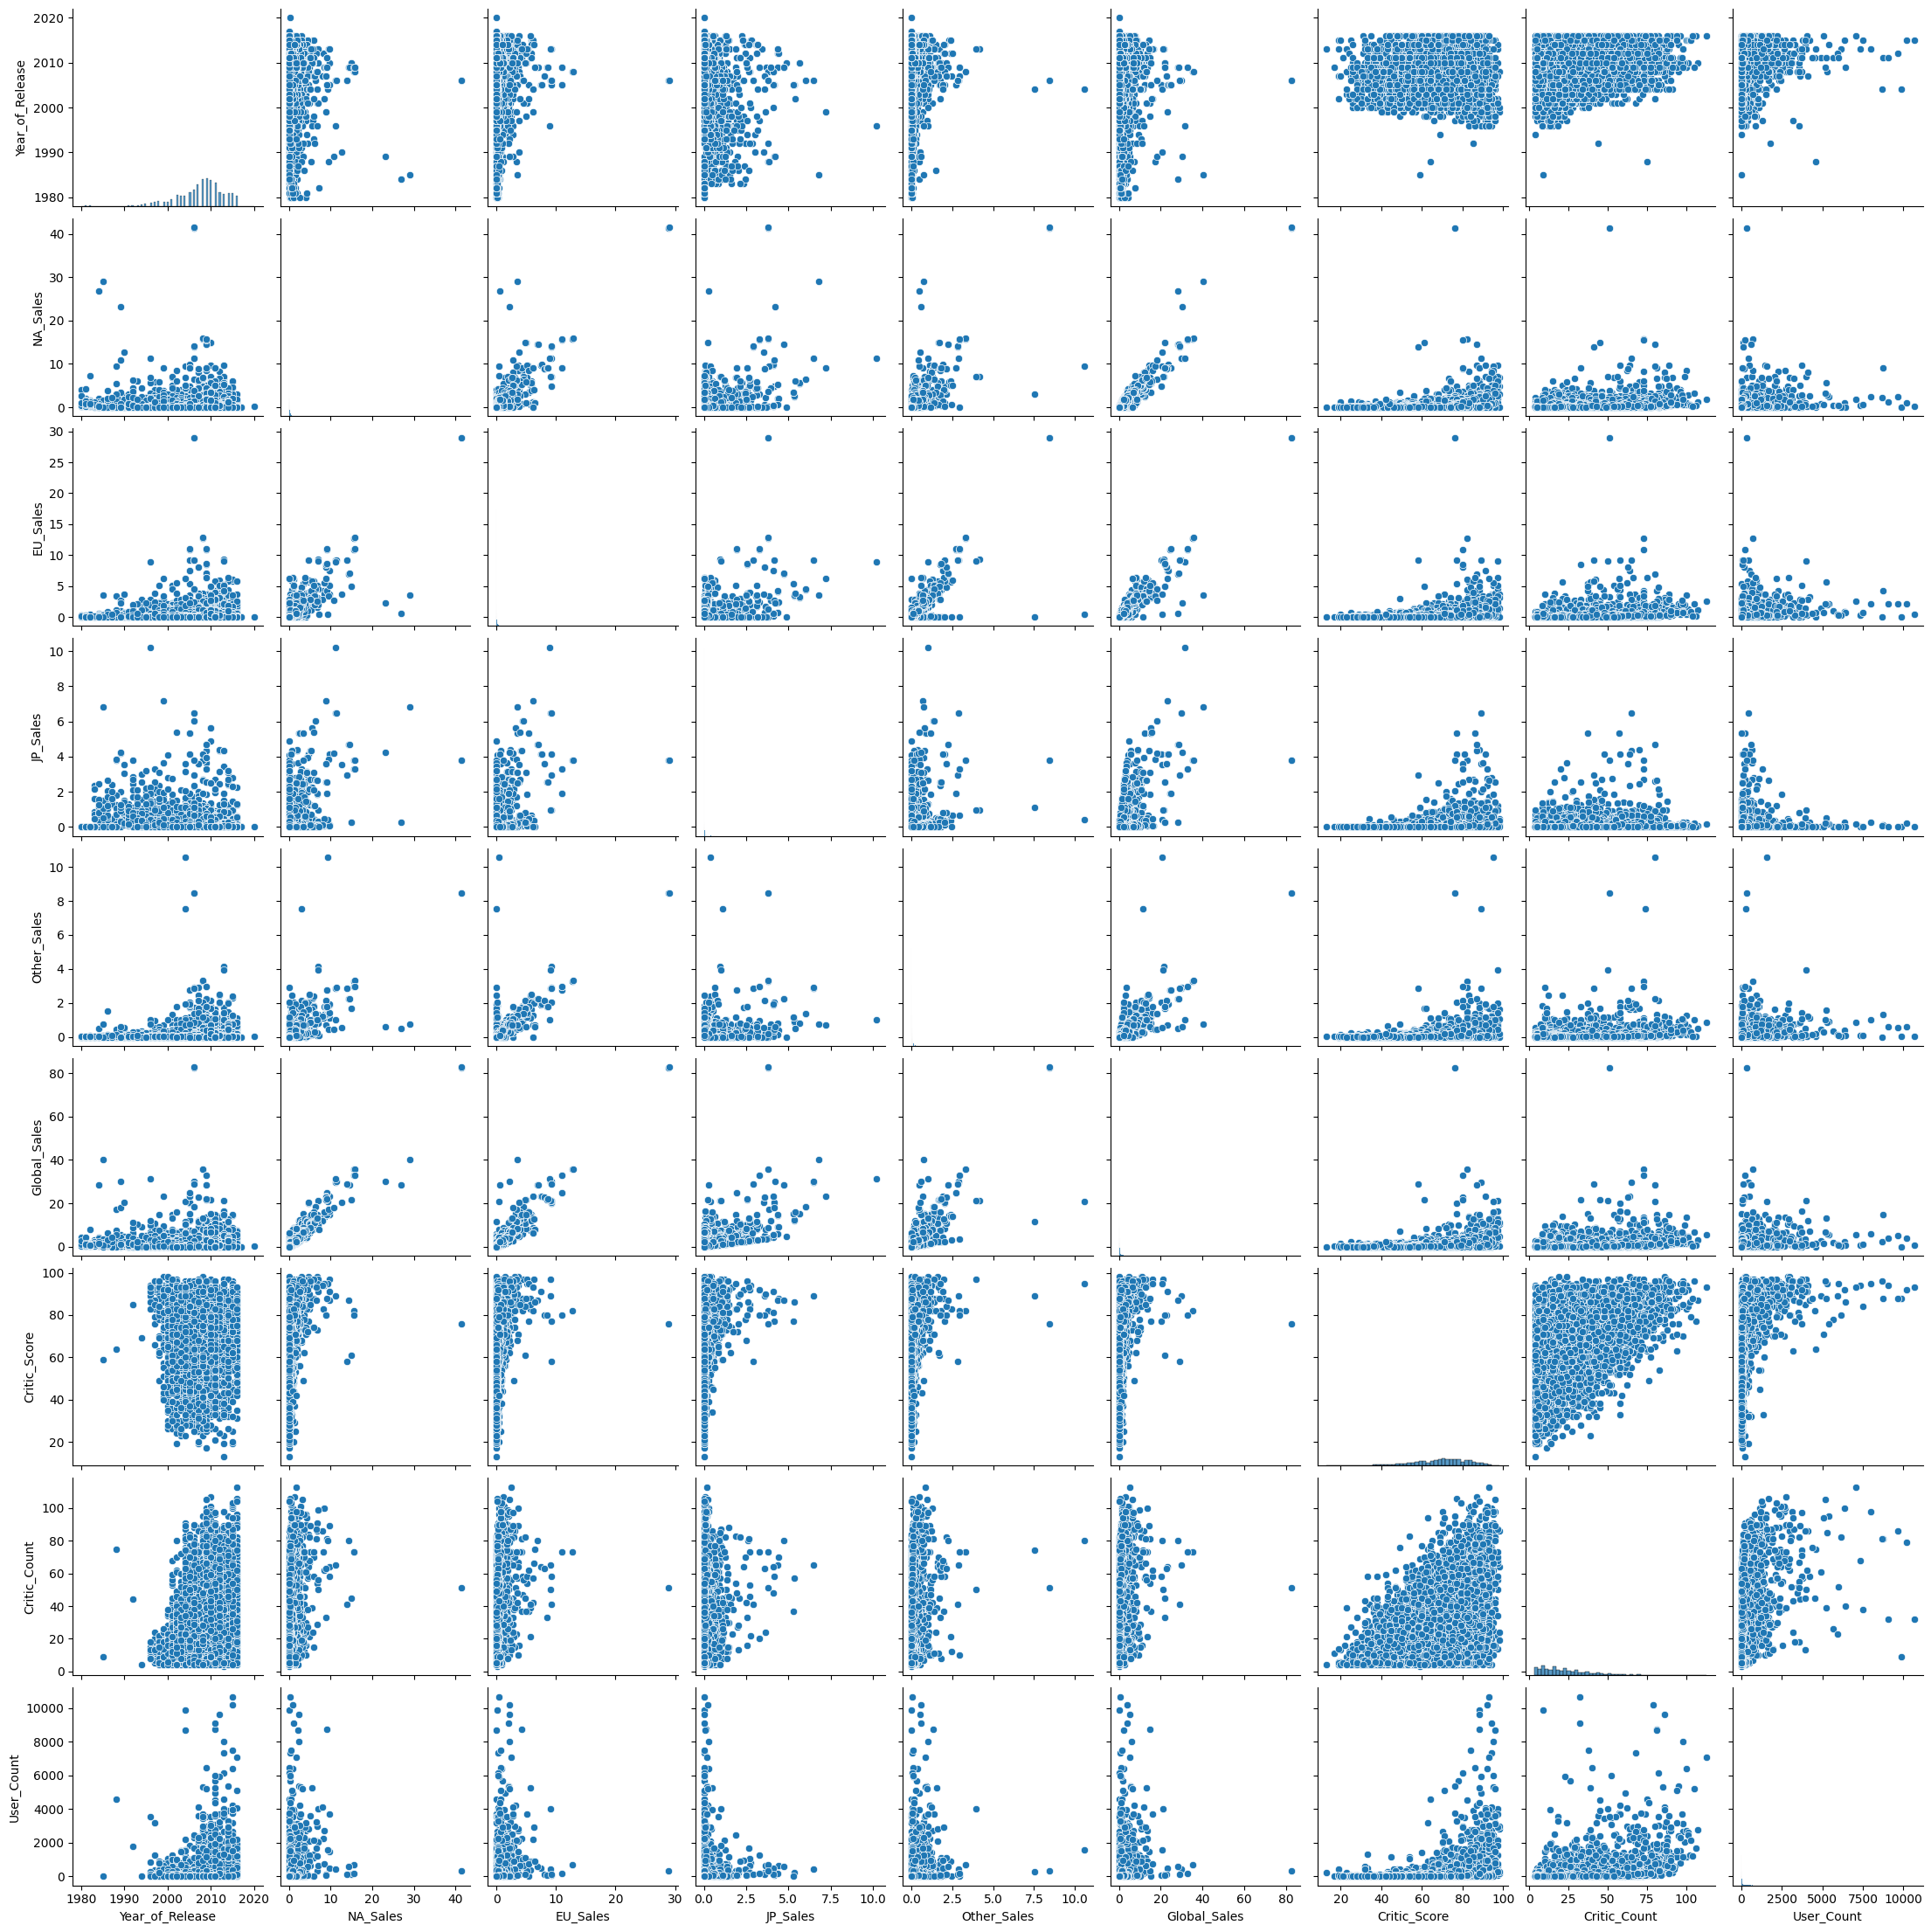

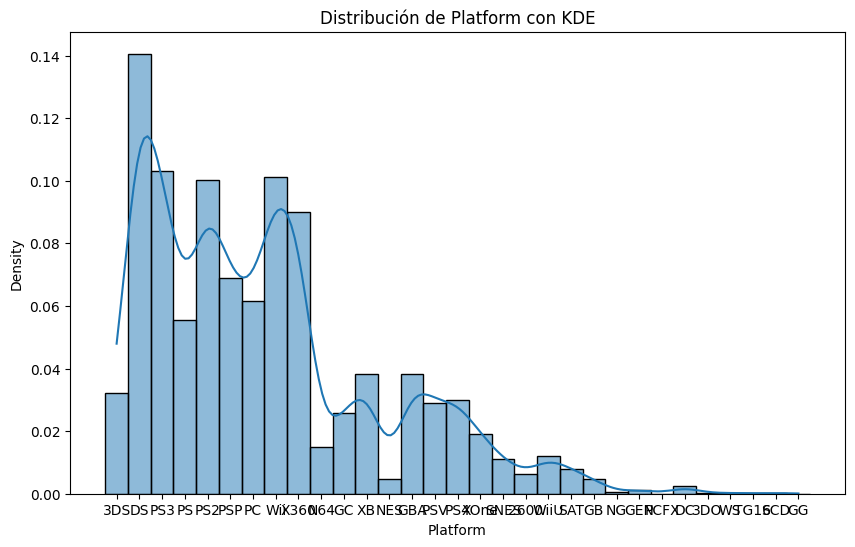

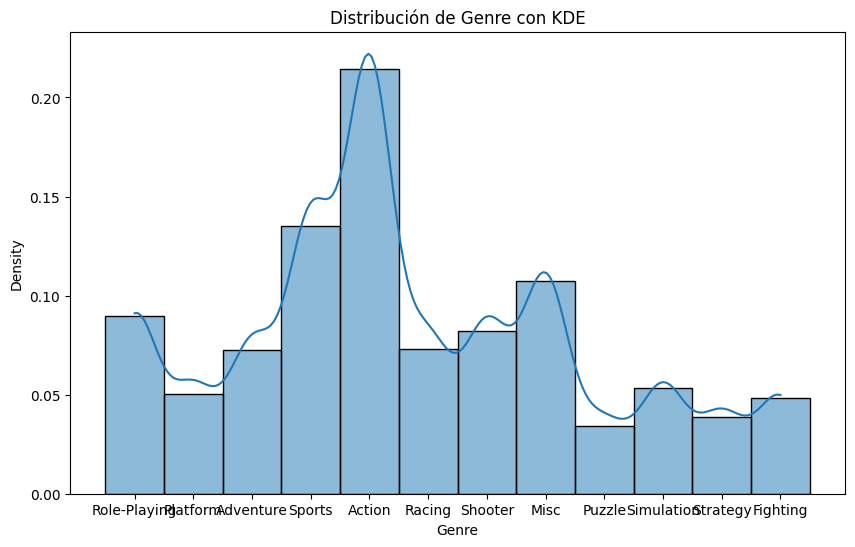

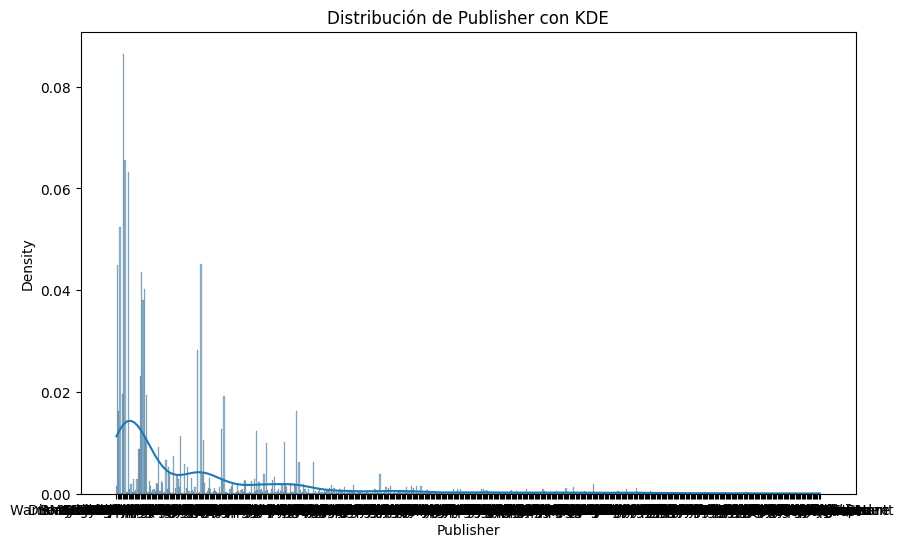

In [38]:

# Seleccionar columnas numéricas relevantes
numeric_columns = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Crear el pairplot para variables numéricas
sns.pairplot(merged_data[numeric_columns])
plt.show()

# Histplot con KDE para variables categóricas
categorical_columns = ['Platform', 'Genre', 'Publisher']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_data, x=column, kde=True, stat="density", discrete=True)
    plt.title(f"Distribución de {column} con KDE")
    plt.show()

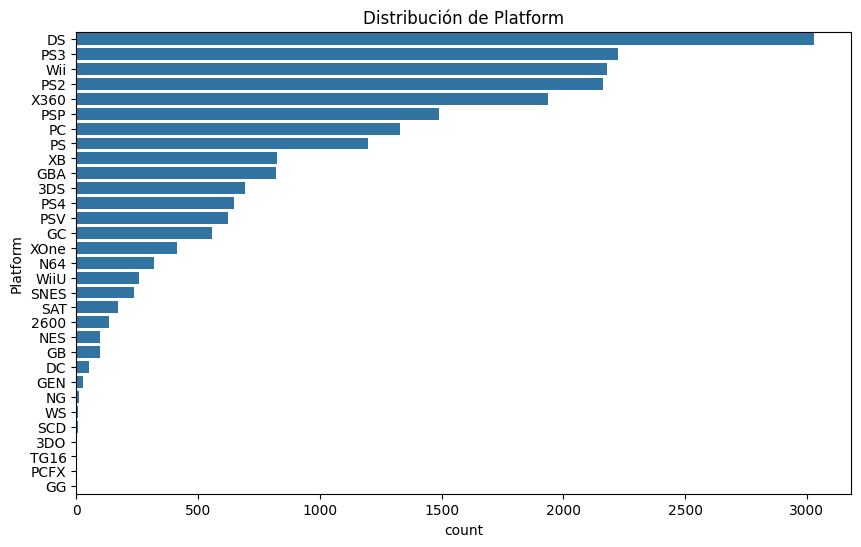

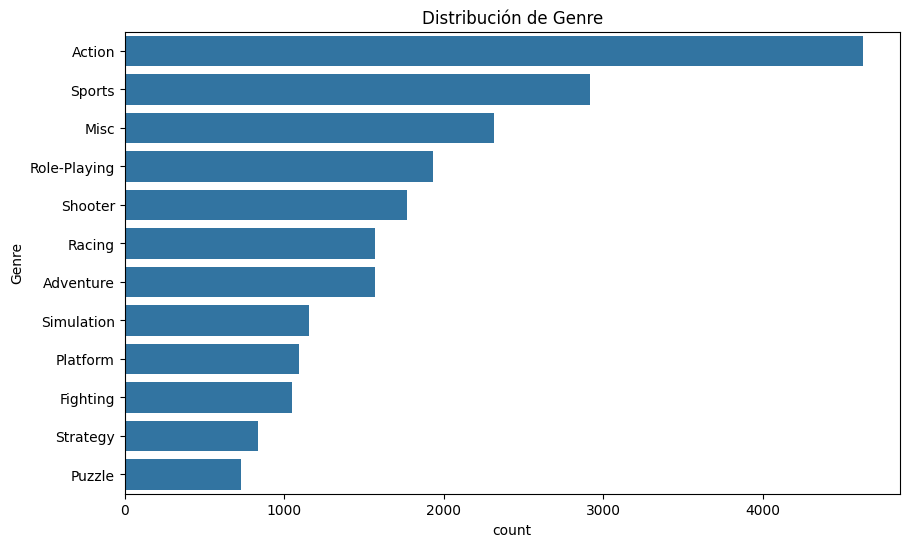

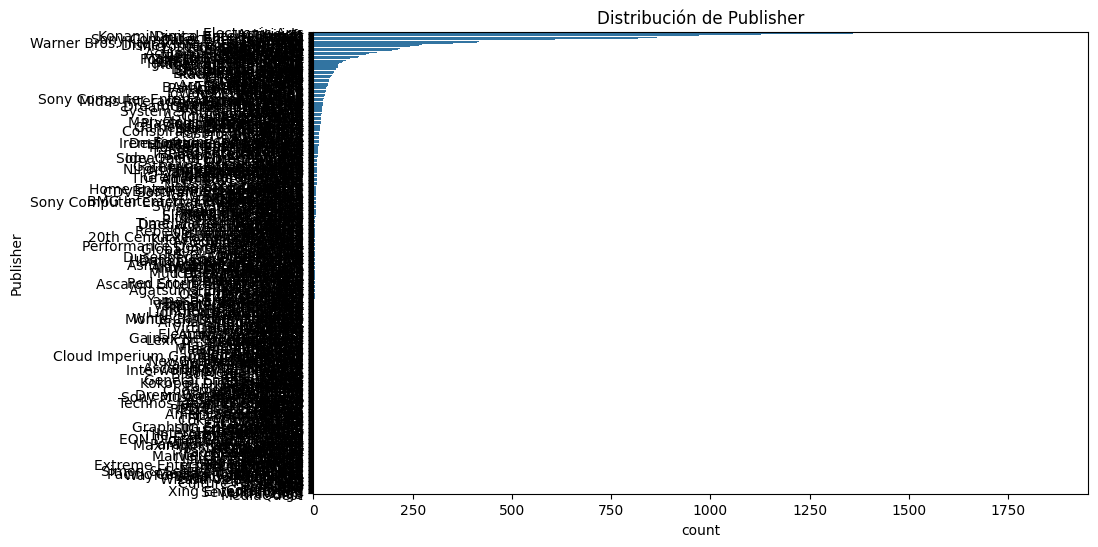

In [39]:
categorical_columns = ['Platform', 'Genre', 'Publisher']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_data, y=column, order=merged_data[column].value_counts().index)
    plt.title(f"Distribución de {column}")
    plt.show()
